In [2]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

## Find chernoff bound for P(X <= 200) for:

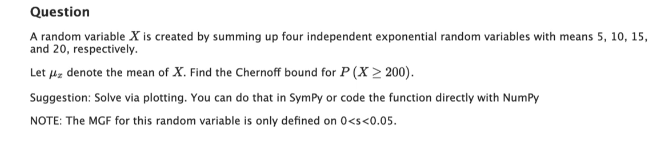

In [3]:
s = sp.symbols('s')

In [4]:
MGF = ((1-5*s)*(1-10*s)*(1-15*s)*(1-20*s))**-1
MGF

1/((1 - 20*s)*(1 - 15*s)*(1 - 10*s)*(1 - 5*s))

In [5]:
# Chernoff Inequality:
ch = sp.exp(-200*s)*MGF
ch

exp(-200*s)/((1 - 20*s)*(1 - 15*s)*(1 - 10*s)*(1 - 5*s))

In [6]:
ch.diff(s).evalf(subs={s:0}) # So we don't do this?

-150.000000000000

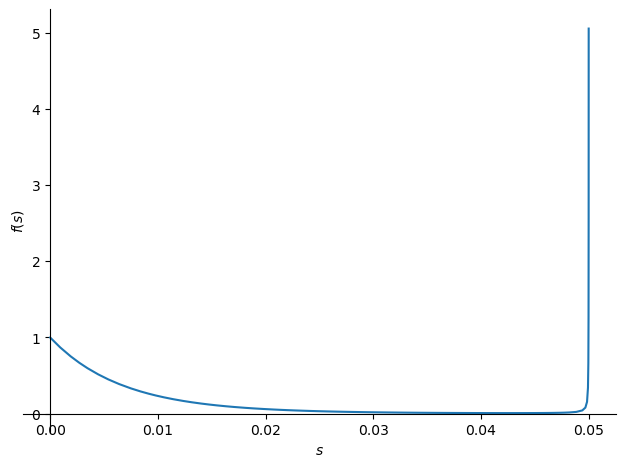

In [7]:
sp.plot(ch, (s,0,1/20));

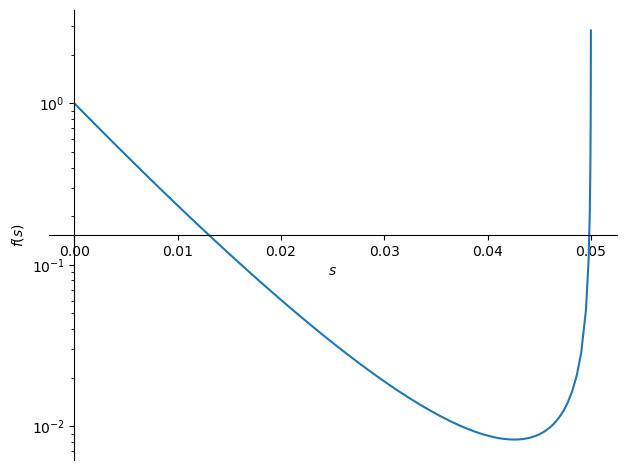

In [8]:
sp.plot(ch, (s,0,1/20), yscale='log')

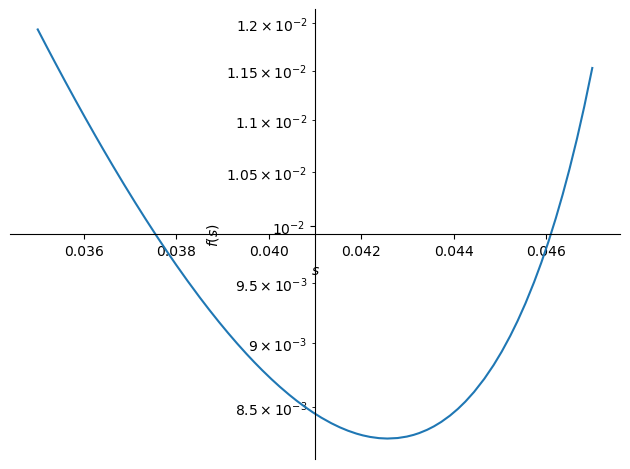

In [9]:
sp.plot(ch, (s,.035,.047), yscale='log')

In [10]:
# simpler chernoff bound (cb)
cbfun = sp.lambdify(s,ch)

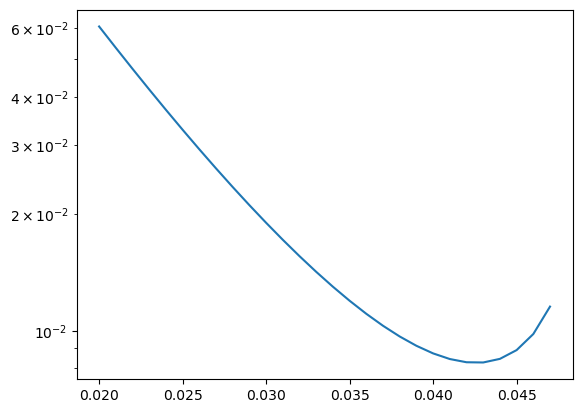

In [11]:
x = np.arange(0.02,.048,0.001)
plt.semilogy(x,cbfun(x))

In [12]:
from scipy.optimize import minimize

In [13]:
minimize(cbfun, 1/40, bounds=[(0,.0499999)])

      fun: 0.008263293829592308
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([1.53523028e-07])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 18
      nit: 7
     njev: 9
   status: 0
  success: True
        x: array([0.04257725])

## Find chernoff bound for P(X >= 2) for:

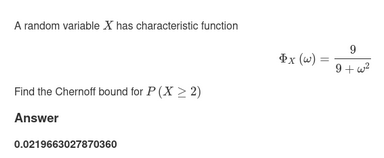

In [14]:
cb = 9*sp.exp(-2*s)/(9-s**2)
cb

9*exp(-2*s)/(9 - s**2)

In [15]:
cb.diff(s)

18*s*exp(-2*s)/(9 - s**2)**2 - 18*exp(-2*s)/(9 - s**2)

In [16]:
cbfun = sp.lambdify(s,cb)
x = np.arange(0.02,3,0.001)
np.min(cbfun(x))

0.021966310425454647

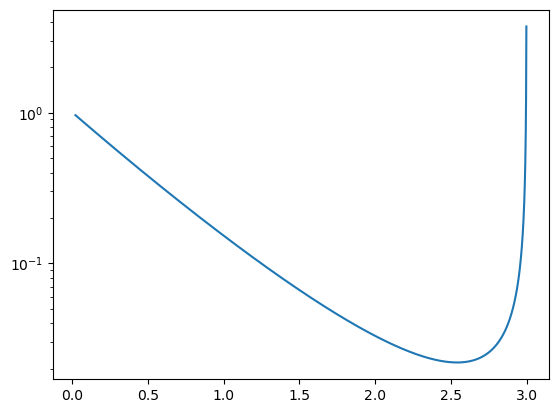

In [17]:
plt.semilogy(x,cbfun(x));